# FYP Fraud Detection Using Deep Hybrid Learning
### Zaidan Mufaddhal - AIU20092029

## 1. Importing Essential Libraries

In [4]:
import pandas as pd
import numpy as np
import keras
np.random.seed(2)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [5]:
# Function to plot Confusion Matrix (to be used later).
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [6]:
data=pd.read_csv('C:/Users/zaida/Downloads/credit_card_dataset/creditcard.csv')

## 2. Exploratory Data Analysis (EDA)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


C:\Users\zaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

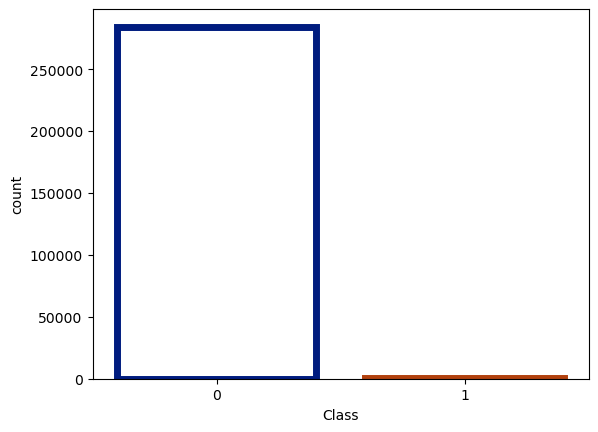

In [9]:
# To check the count of fraudulent and normal transactions
sns.countplot(data['Class'],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3), label = "Count")

In [10]:
# Now Checking actual number of fraudulent transactions
fraud_indices=np.array(data[data.Class==1].index)
no_records_fraud=len(fraud_indices)
normal_indices=np.array(data[data.Class==0].index)
no_records_normal=len(normal_indices)

print("No. of Fraudulent Transaction is {} and No. of Normal Transaction is {}".format(no_records_fraud, no_records_normal))

No. of Fraudulent Transaction is 492 and No. of Normal Transaction is 284315


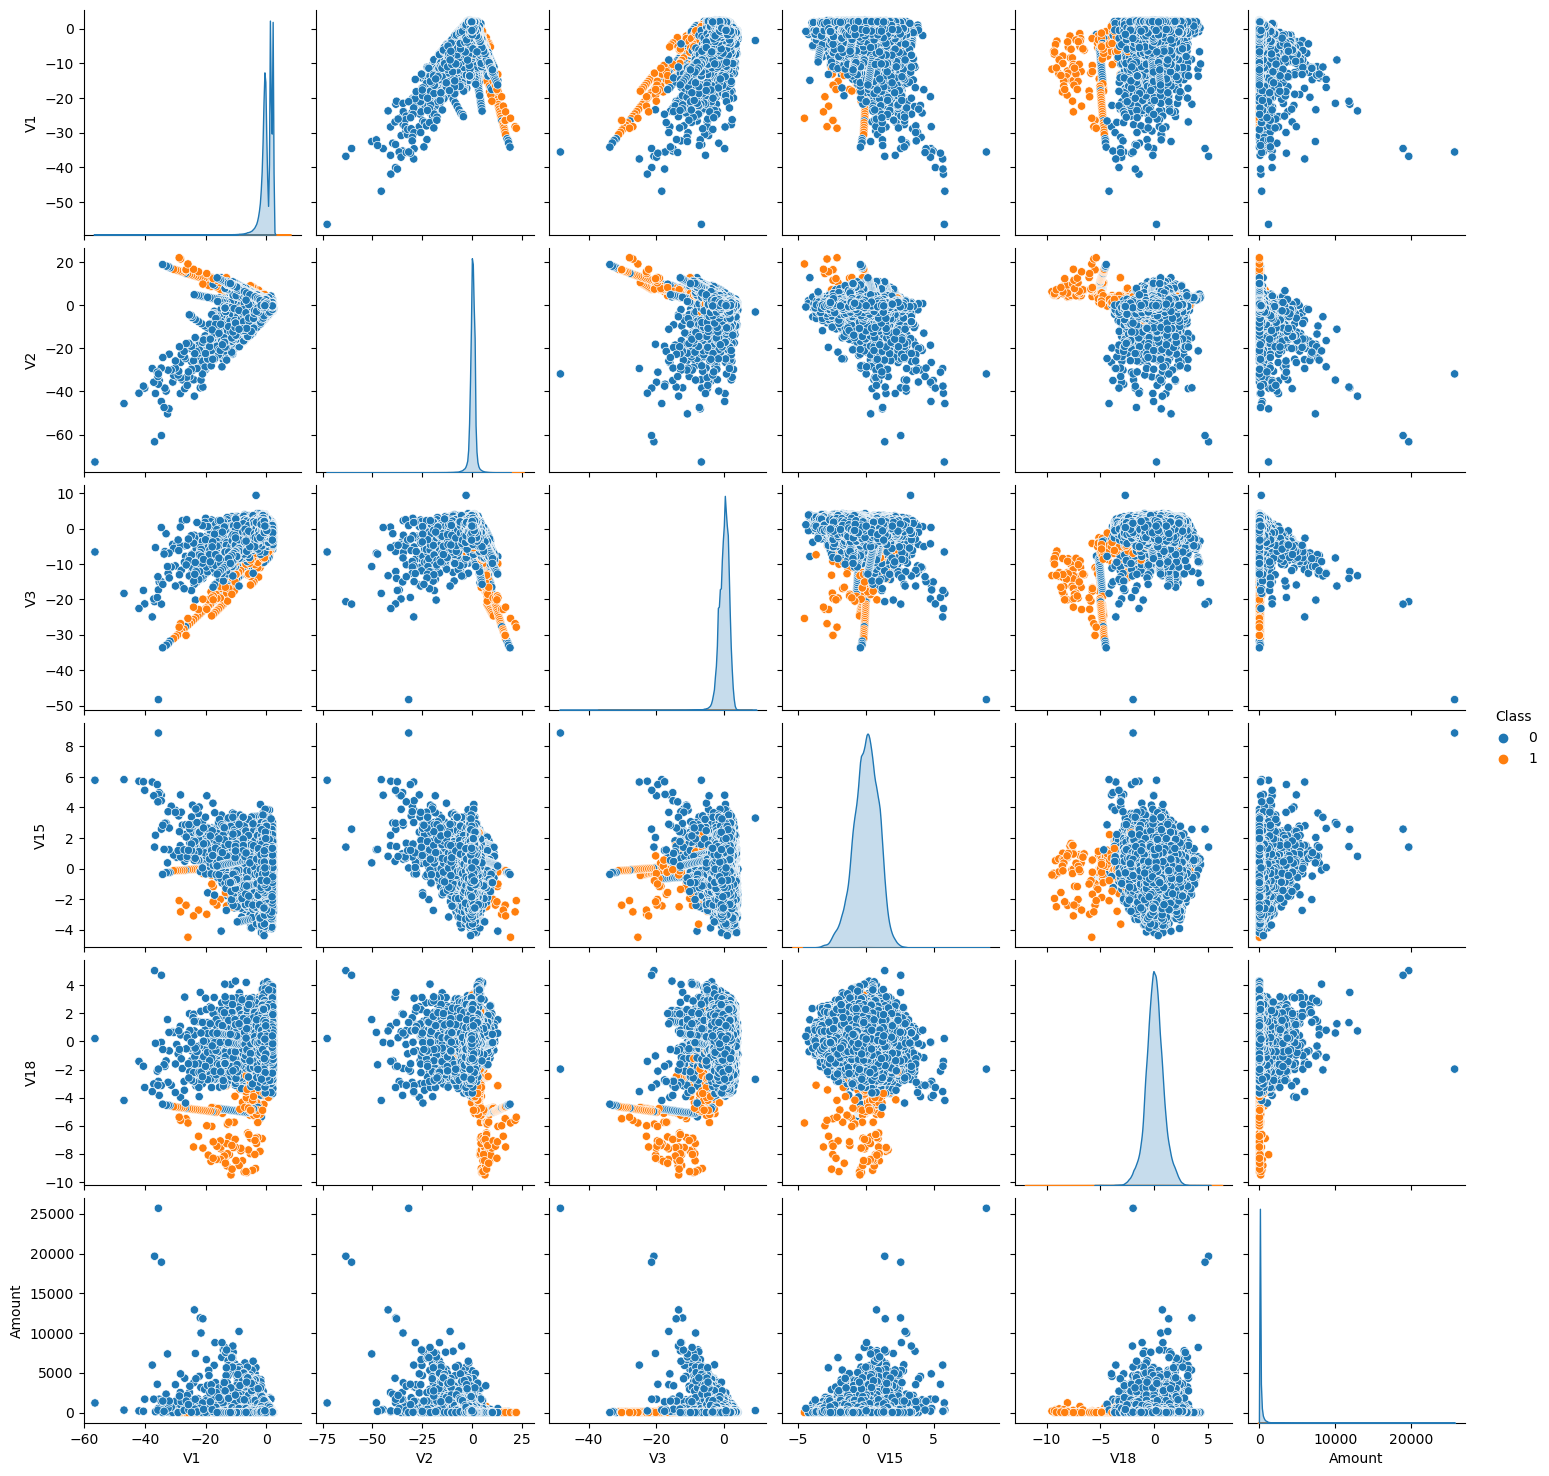

In [11]:
# To see the actual distribution of data 
sns.pairplot(data, hue = 'Class', vars = ['V1', 'V2', 'V3', 'V15', 'V18','Amount'] )

<AxesSubplot:xlabel='Amount', ylabel='Density'>

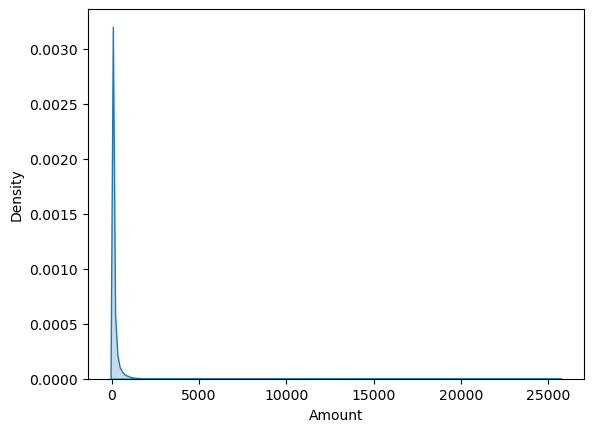

In [12]:
sns.kdeplot(data['Amount'],shade=True)

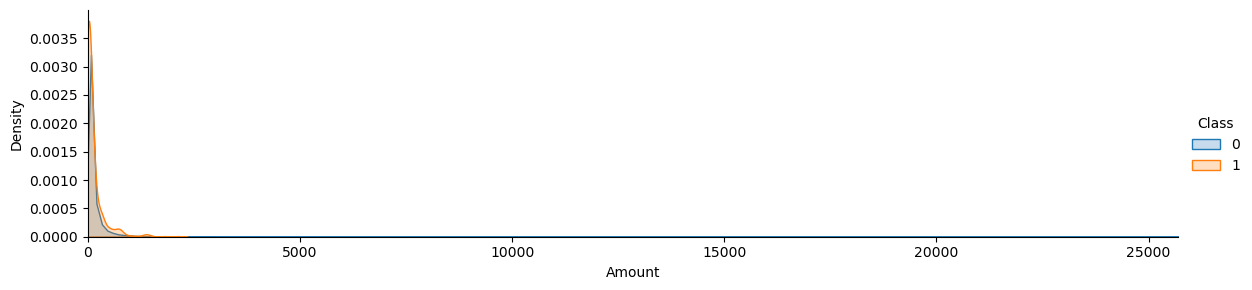

In [13]:
# To see the the actual distribution of Amount

fig=sns.FacetGrid(data,hue='Class',aspect=4)
fig.map(sns.kdeplot,'Amount',shade=True)
oldest=data['Amount'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<AxesSubplot:xlabel='Amount', ylabel='V1'>

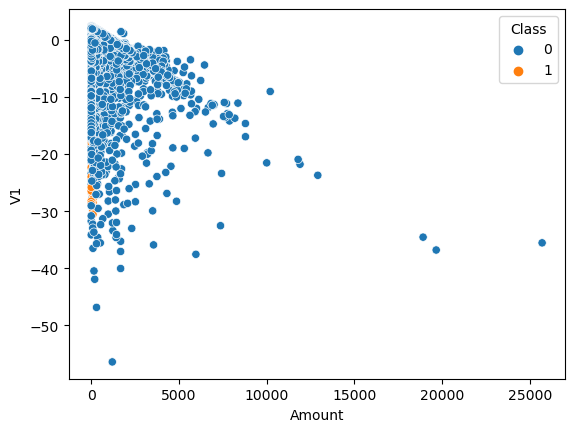

In [14]:
sns.scatterplot(x = 'Amount', y = 'V1',hue='Class',  data = data)

In [15]:
dataset2 = data.drop(columns = ['Class'])

## 3. Finding Correlation with target variable

<AxesSubplot:title={'center':'Correlation with Class'}>

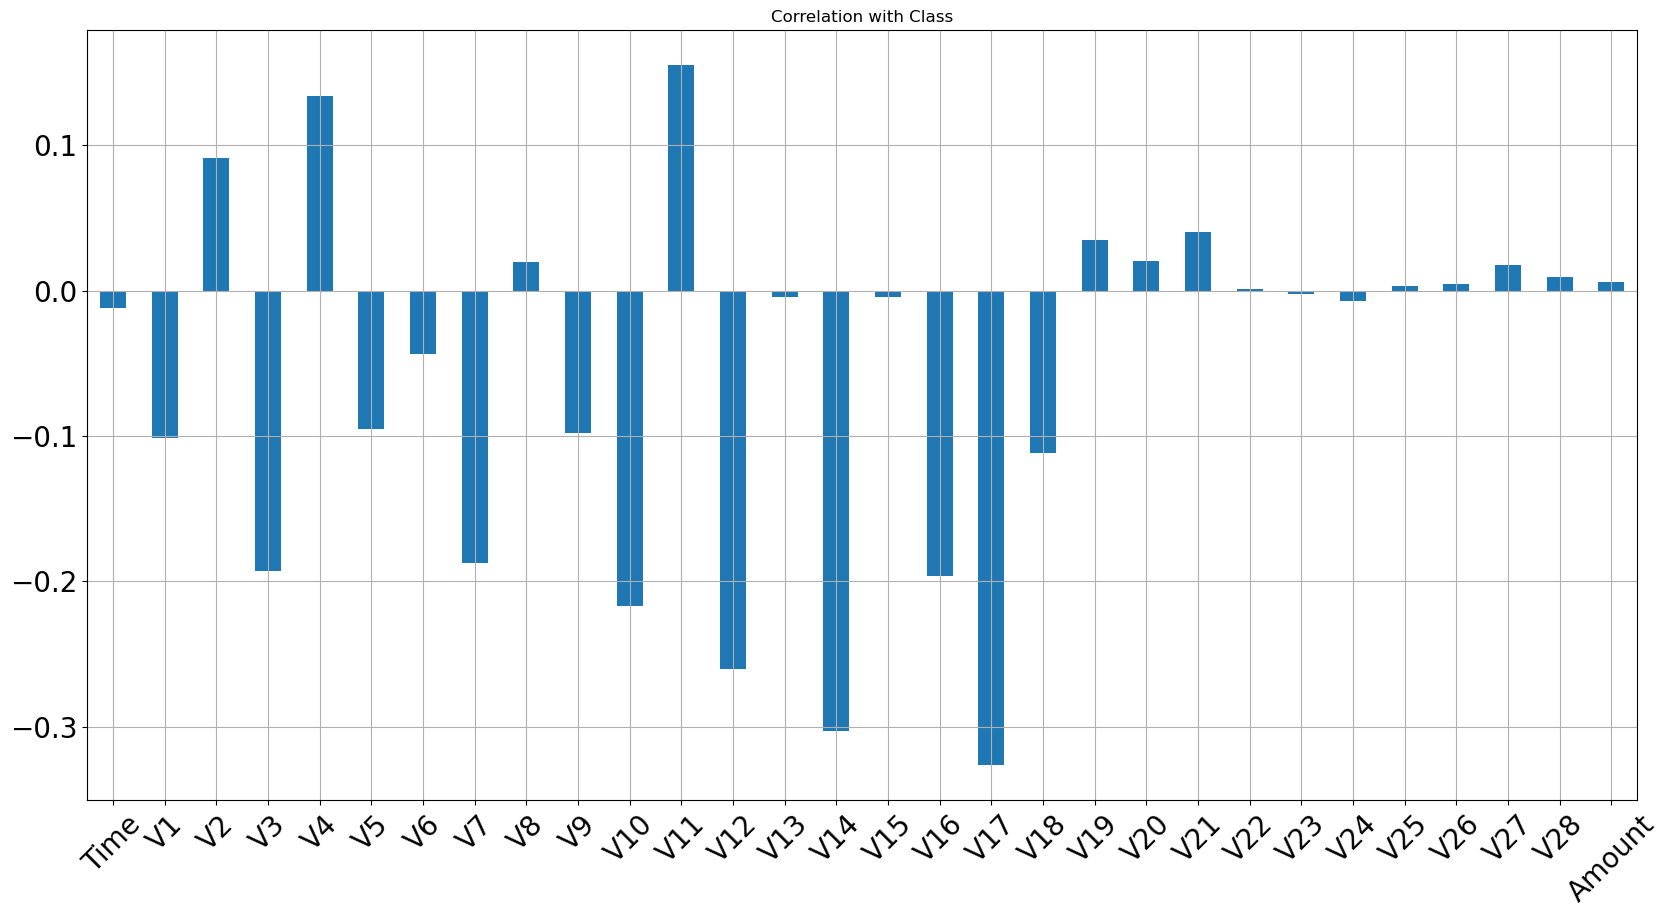

In [16]:
dataset2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class", fontsize = 20,
        rot = 45, grid = True)

## 4. Preprocessing

In [17]:
data['normalized_amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
# Dropping the actual Amount column from the dataset.
data=data.drop(['Amount'],axis=1)

In [18]:
# To check the dataset for changed column
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [19]:
# I think Time is the irrelevant column so we are dropping the Time column from dataset.
data=data.drop(['Time'],axis=1)

In [20]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [21]:
# Assigning X and Y 
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

In [22]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [23]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


## 5. Splitting data into Train and Test set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [25]:
X_train.shape

(199364, 29)

In [26]:
X_test.shape

(85443, 29)

In [27]:
# As we have to supply the X test,X_Train,ytest,y_train into deep learning models so we have to convert it into numpy arrays.
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

## 6. Modelling

### a. DL - Artificial Neural Network (ANN)

In [28]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

In [29]:
model = Sequential([
     Dense(units=16, input_dim=29, activation='relu'),
     Dense(units=24,activation='relu'),
     Dropout(0.5),
     Dense(20,activation='relu'),
     Dense(24,activation='relu'),
     Dense(1,activation='sigmoid')  
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                500       
                                                                 
 dense_8 (Dense)             (None, 24)                504       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [30]:
# Using Adam Optimizer as the optimizer because it combines the pros of AdaGrad and RMSProp
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=32, epochs=50)

Epoch 1/50
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0103 - accuracy: 0.9987
Epoch 2/50
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0040 - accuracy: 0.9992
Epoch 3/50
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/50
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 5/50
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 6/50
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 7/50
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 8/50
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 9/50
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 10/50
6231/6231 [==============================] - 7s 1ms/step - loss:

In [31]:
score=model.evaluate(X_test,y_test)
print(score)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0079 - accuracy: 0.9992
[0.007912056520581245, 0.9992275834083557]


In [32]:
y_pred=model.predict(X_test)
y_test=pd.DataFrame(y_test)

2671/2671 [==============================] - 4s 2ms/step


Confusion matrix, without normalization
[[85290     6]
 [   60    87]]


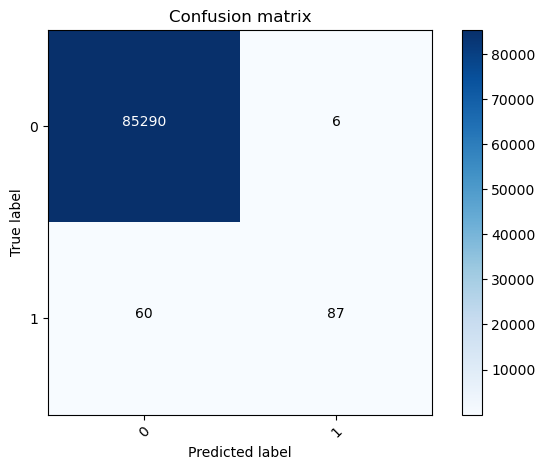

In [33]:
# Performance evaluation using confusion matrix
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

8901/8901 [==============================] - 12s 1ms/step
Confusion matrix, without normalization
[[284303     12]
 [   185    307]]


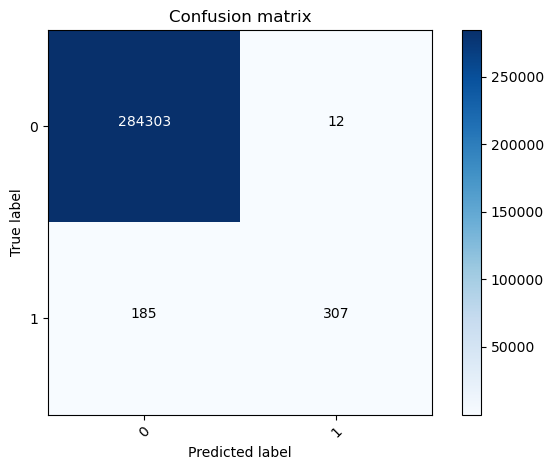

In [34]:
# Confusion matrix for entire dataset
y_pred=model.predict(X)
y_test=pd.DataFrame(y)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

### b. Ensemble Learning - Random Forest

In [42]:
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [45]:
y_pred=random_forest.predict(X_test)

Confusion matrix, without normalization
[[85291     5]
 [   33   114]]


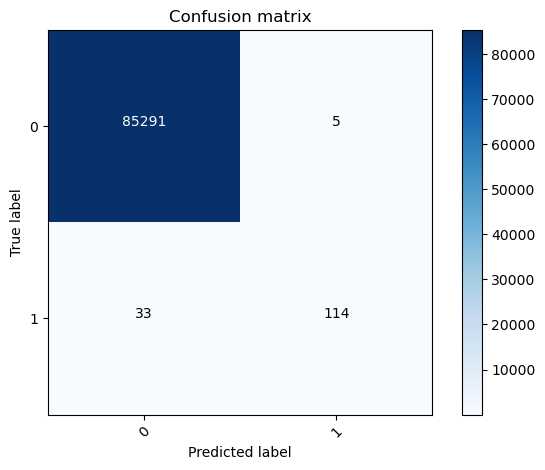

In [46]:
# Confusion matrix - performance evaluation
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[284310      5]
 [    33    459]]


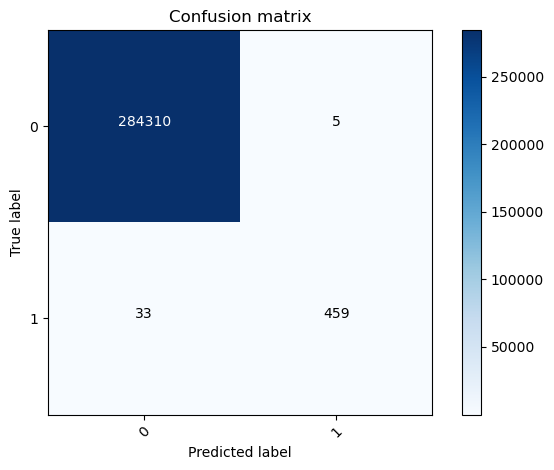

In [47]:
# Confusion matrix for entire dataset
y_pred=random_forest.predict(X)

cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

### c. ML - Decision Tree Classifier

In [48]:
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [50]:
from sklearn.tree import DecisionTreeClassifier
decc=DecisionTreeClassifier()
decc.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [51]:
y_pred=decc.predict(X_test)

In [52]:
decc.score(X_test,y_test)

0.9992743700478681

Confusion matrix, without normalization
[[85269    27]
 [   35   112]]


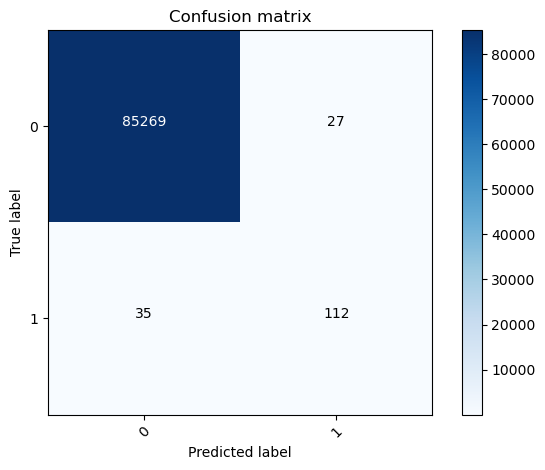

In [53]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[284288     27]
 [    35    457]]


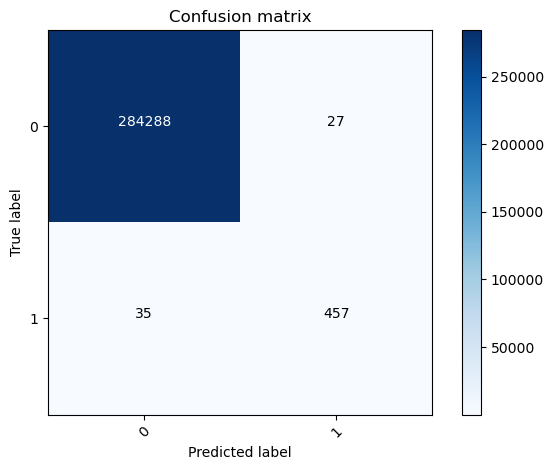

In [54]:
# Confusion matrix for entire dataset
y_pred=decc.predict(X)

cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

### d. Hybrid DL ML - SMOTE & ANN

##### Undersampling

In [55]:
fraud_indices=np.array(data[data.Class==1].index)
no_records_fraud=len(fraud_indices)
print(no_records_fraud)

492


In [56]:
normal_indices=data[data.Class==0].index

In [57]:
random_normal_indices=np.random.choice(normal_indices,no_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [58]:
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [59]:
under_sample_data=data.iloc[under_sample_indices,:]

In [60]:
under_sample_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [61]:
X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Class']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state=0)

In [63]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

##### Modelling the undersampled data

In [64]:
model = Sequential([
     Dense(units=16, input_dim=29, activation='relu'),
     Dense(units=24,activation='relu'),
     Dropout(0.5),
     Dense(20,activation='relu'),
     Dense(24,activation='relu'),
     Dense(1,activation='sigmoid')  
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                480       
                                                                 
 dense_11 (Dense)            (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                500       
                                                                 
 dense_13 (Dense)            (None, 24)                504       
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=5)

Epoch 1/5
46/46 [==============================] - 2s 3ms/step - loss: 0.5512 - accuracy: 0.5858
Epoch 2/5
46/46 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.7442
Epoch 3/5
46/46 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8997
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8997
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.2282 - accuracy: 0.9201


10/10 [==============================] - 0s 2ms/step
Confusion matrix, without normalization
[[147   2]
 [ 19 128]]


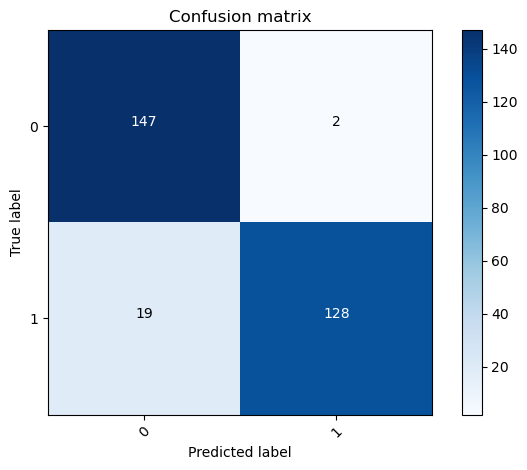

In [66]:
y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

8901/8901 [==============================] - 12s 1ms/step
Confusion matrix, without normalization
[[280422   3893]
 [    61    431]]


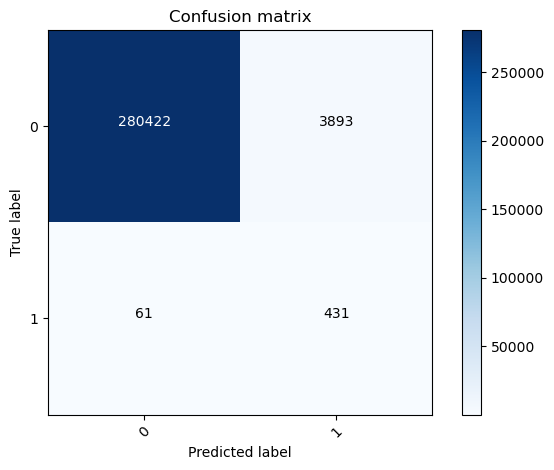

In [67]:
# Confusion matrix for entire dataset
y_pred=model.predict(X)

cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

##### Overfitting - Modelling Synthetic Minority Over-sampling Technique (SMOTE)

In [68]:
X_resample,y_resample=SMOTE().fit_resample(X,y.values.ravel())

In [69]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=0)

In [71]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

##### Modelling Deep Neural Network with Oversampled Data

In [ ]:
# Hyperparameters tunning / optimization: change the optimizer, loss, and epochs
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=16, epochs=100)

Epoch 1/100
24878/24878 [==============================] - 52s 2ms/step - loss: 0.0418 - accuracy: 0.9852
Epoch 2/100
24878/24878 [==============================] - 51s 2ms/step - loss: 0.0161 - accuracy: 0.9956
Epoch 3/100
24878/24878 [==============================] - 51s 2ms/step - loss: 0.0127 - accuracy: 0.9968
Epoch 4/100
24878/24878 [==============================] - 51s 2ms/step - loss: 0.0107 - accuracy: 0.9974
Epoch 5/100
24878/24878 [==============================] - 51s 2ms/step - loss: 0.0095 - accuracy: 0.9977
Epoch 6/100
24878/24878 [==============================] - 51s 2ms/step - loss: 0.0088 - accuracy: 0.9980
Epoch 7/100
24878/24878 [==============================] - 51s 2ms/step - loss: 0.0088 - accuracy: 0.9979
Epoch 8/100
24878/24878 [==============================] - 50s 2ms/step - loss: 0.0081 - accuracy: 0.9982
Epoch 9/100
24878/24878 [==============================] - 51s 2ms/step - loss: 0.0075 - accuracy: 0.9983
Epoch 10/100
24878/24878 [====================

5331/5331 [==============================] - 8s 1ms/step
Confusion matrix, without normalization
[[84926   246]
 [  104 85313]]


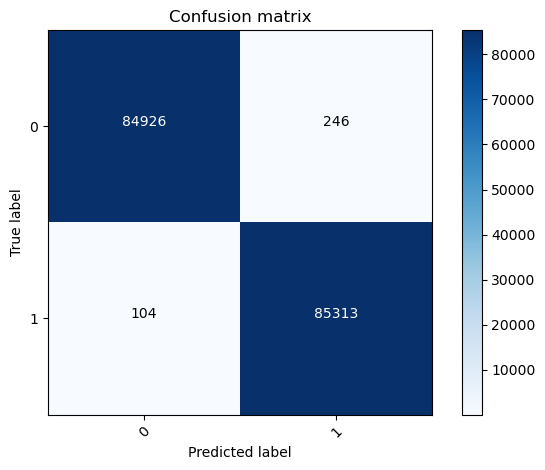

In [74]:
y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

8901/8901 [==============================] - 13s 1ms/step
Confusion matrix, without normalization
[[283551    764]
 [     4    488]]


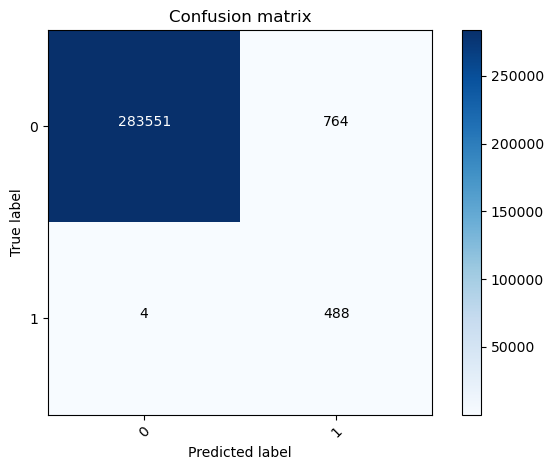

In [75]:
# Confusion matrix for entire dataset
y_pred=model.predict(X)

cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()